In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import ConvexHull
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('data/Barcelona_Rent_Price_vf.csv', encoding='latin1')

In [3]:
# Seleccionamos las columnas y limpiamos el dataset
X = df[['square_meters', 'price']].dropna()

In [4]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

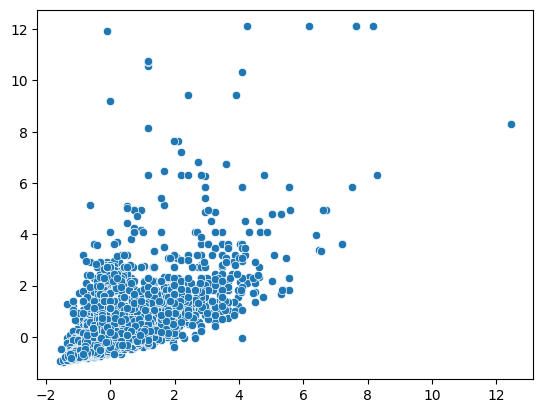

In [5]:
_ = sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1])

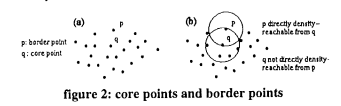

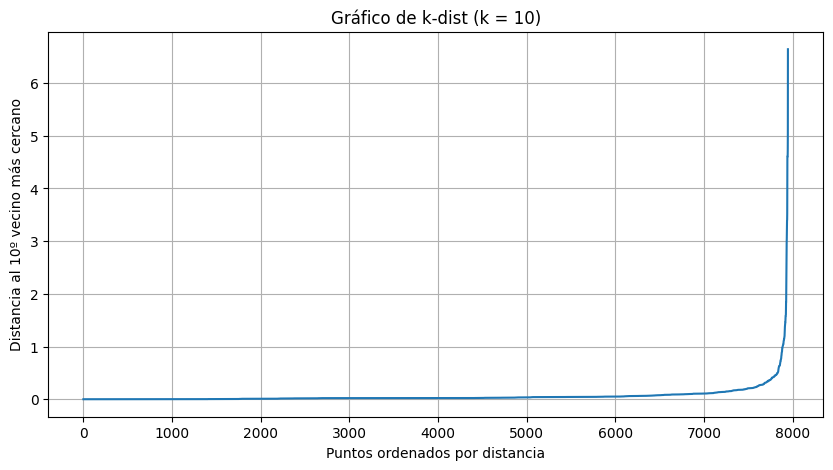

In [6]:
# Busqueda de k-dist
# Cálculo de vecinos más cercanos
k = 10
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled)
distances, _ = neigh.kneighbors(X_scaled)

# distancia al k-ésimo vecino más cercano
k_distances = np.sort(distances[:, -1])

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.title(f"Gráfico de k-dist (k = {k})")
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel(f"Distancia al {k}º vecino más cercano")
plt.grid(True)
plt.show()


In [7]:
# Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=7) # eps lo obtenemos del "codo" en la gráfica anterior
dbscan_labels = dbscan.fit_predict(X_scaled)
X['dbscan_cluster'] = dbscan_labels


In [8]:
# Aplicamos K-means para comparar
kmeans = KMeans(n_clusters=4, random_state=42)  # Cambia n_clusters si lo deseas
kmeans_labels = kmeans.fit_predict(X_scaled)
X['kmeans_cluster'] = kmeans_labels


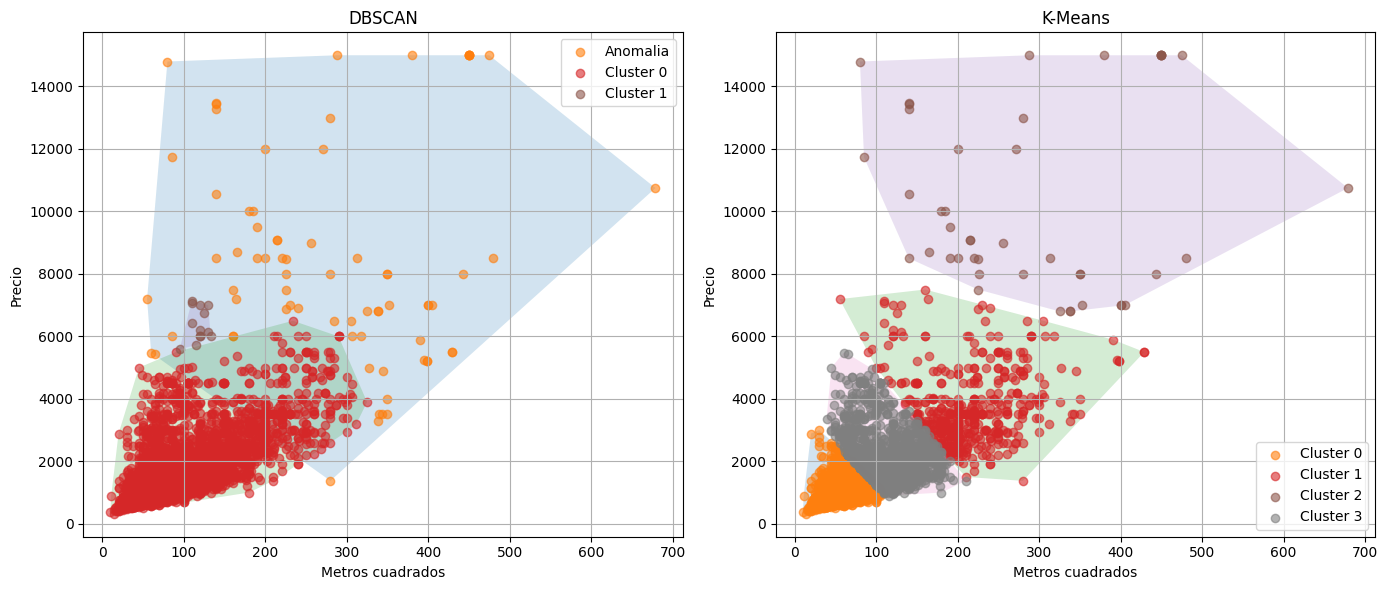

In [11]:
# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# DBSCAN
for group, subset in X.groupby('dbscan_cluster'):
    pts = subset[['square_meters', 'price']].values
    hull = ConvexHull(pts)
    axes[0].fill(pts[hull.vertices, 0], pts[hull.vertices, 1], alpha=0.2)
    label = f"Cluster {group}" if group != -1 else "Anomalia"
    axes[0].scatter(subset['square_meters'], subset['price'], label=label, alpha=0.6)

    
axes[0].set_title("DBSCAN")
axes[0].set_xlabel("Metros cuadrados")
axes[0].set_ylabel("Precio")
axes[0].legend()
axes[0].grid(True)


# KMeans
for group, subset in X.groupby('kmeans_cluster'):
    pts = subset[['square_meters', 'price']].values
    hull = ConvexHull(pts)
    axes[1].fill(pts[hull.vertices, 0], pts[hull.vertices, 1], alpha=0.2)
    axes[1].scatter(subset['square_meters'], subset['price'], label=f"Cluster {group}", alpha=0.6)
axes[1].set_title("K-Means")
axes[1].set_xlabel("Metros cuadrados")
axes[1].set_ylabel("Precio")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('barcelona_rent_prices.svg')
plt.show()